In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from data_sort import dz_clean, daz_clean, dbz_clean

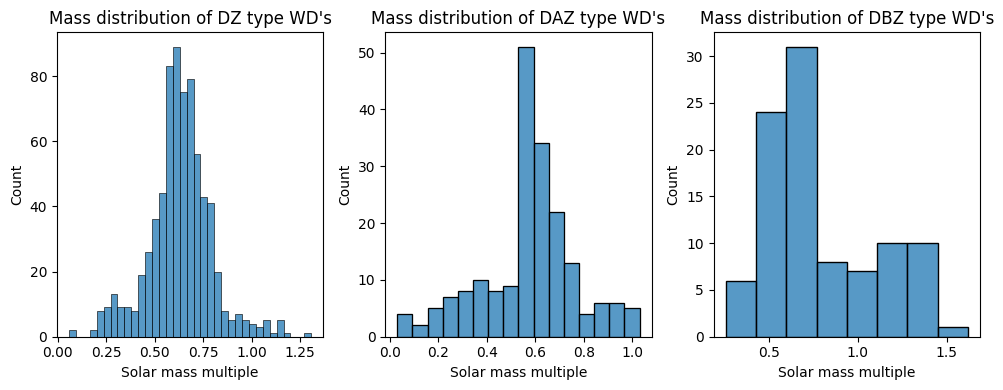

In [3]:
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
sns.histplot(dz_clean()['mass'],ax=axis[0])
axis[0].set_xlabel("Solar mass multiple")
axis[0].set_title("Mass distribution of DZ type WD's")     # WD = white dwarfs       

sns.histplot(daz_clean()['mass'],ax=axis[1])
axis[1].set_xlabel("Solar mass multiple")
axis[1].set_title("Mass distribution of DAZ type WD's")

sns.histplot(dbz_clean()['mass'],ax=axis[2])
axis[2].set_xlabel("Solar mass multiple")
axis[2].set_title("Mass distribution of DBZ type WD's")

plt.tight_layout()
plt.show()


In [4]:
# dz_clean().head()

In [5]:
# print(dz_clean().columns.get_loc("loghhe"))
# print(dz_clean().columns.get_loc("logsrhe"))

In [6]:
# for column in dz_clean().columns[9:28]:
#     sns.boxplot(data=dz_clean()[column])
#     plt.title(f'Boxplot for {column}')
#     plt.show()


In [7]:
for column in dz_clean().columns[9:28]:
    print(dz_clean()[column].value_counts())           #counts how many times each log values are repeated 


loghhe
-4.0        71
<-3.0       65
-3.0        37
-2.0        14
-5.0        14
            ..
<-5.3266     1
<-3.793      1
<-3.4583     1
<-3.6267     1
-3.5367      1
Name: count, Length: 777, dtype: int64
logche
-4.0     2
-6.0     2
<-8.0    1
-7.8     1
<-9.0    1
-6       1
<-6.0    1
Name: count, dtype: int64
logohe
<-5.54    1
<-4.0     1
Name: count, dtype: int64
lognahe
-8.73    3
-9.23    3
-8.68    2
-9.27    2
-9.0     2
        ..
-8.34    1
-11.0    1
-6.6     1
-8.6     1
-8.03    1
Name: count, Length: 82, dtype: int64
logmghe
-7.3     19
-6.8     14
-7.0     13
-7.2     13
-7.1     12
         ..
-6.63     1
-6        1
-7.39     1
<-7.2     1
-5.2      1
Name: count, Length: 71, dtype: int64
logalhe
<-9.0     1
<-7.84    1
<-8.25    1
<-8.8     1
Name: count, dtype: int64
logsihe
-7.9     2
-9.4     1
-7.45    1
<-7.5    1
<-9.0    1
<-6.8    1
Name: count, dtype: int64
logshe
<-9.50    1
Name: count, dtype: int64
logcahe
-8.5000     17
-8.4000     13
-10.5000    

In [8]:
print(dz_clean()["comp"].value_counts())

comp
He    1080
H        6
Name: count, dtype: int64


In [9]:
# sns.pairplot(dz_clean())

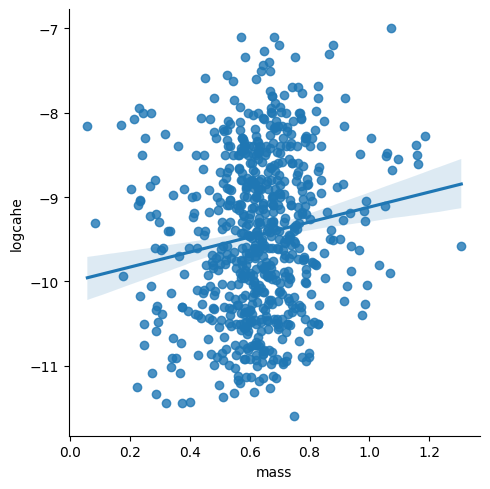

In [10]:
sns.lmplot( data= dz_clean(),x ="mass", y ="logcahe")

In [11]:
# correlation_matrix = dz_clean()[["mass","logcahe"]].corr(numeric_only=True)
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation between Mass and Metal Pollution')
# plt.show()


In [12]:
# print(correlation_matrix)

In [13]:
from scipy.stats import pearsonr

In [14]:
# correlation, p_value = pearsonr(dz_clean().loc[dz_clean()['logcahe'].notnull()][["mass"]], dz_clean().loc[dz_clean()['logcahe'].notnull()][["logcahe"]])

In [28]:
import numpy as np

In [ ]:
# df = dz_clean()[["mass","logcahe"]].dropna(axis=0)                         # for 1 column find pearson corelation with masses

# # print(df.shape)
# correlation, p_value = pearsonr(df["mass"], df["logcahe"])
# print(f"For logcahe :Pearson correlation: {correlation}, P-value: {p_value}")

For loghhe :Pearson correlation: 0.10345117660879556, P-value: 0.1554970830461294


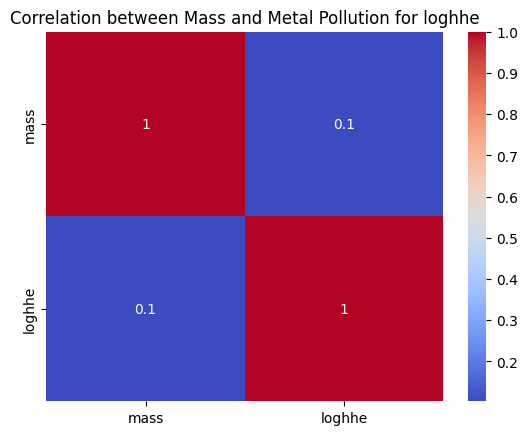

For logche :Pearson correlation: 0.05906482081514497, P-value: 0.9115057971111589


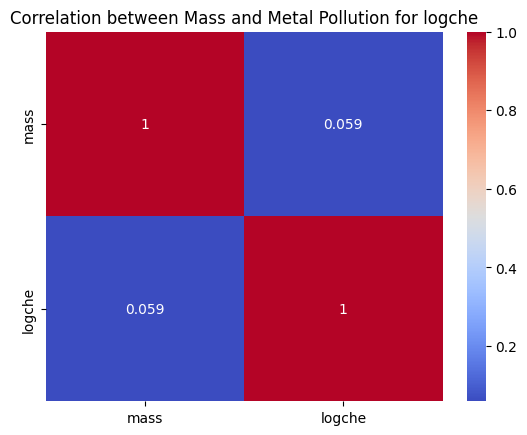

Not enough data for column logohe
For lognahe :Pearson correlation: 0.28119271530033985, P-value: 0.02018631149597735


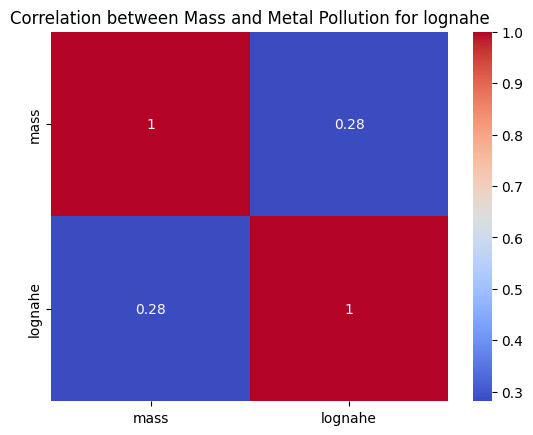

For logmghe :Pearson correlation: 0.25205532592283836, P-value: 0.0016131627236702177


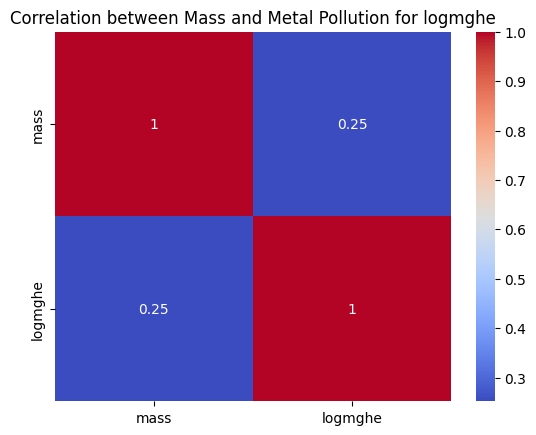

Not enough data for column logalhe
For logsihe :Pearson correlation: 0.8873827513445872, P-value: 0.1126172486554129


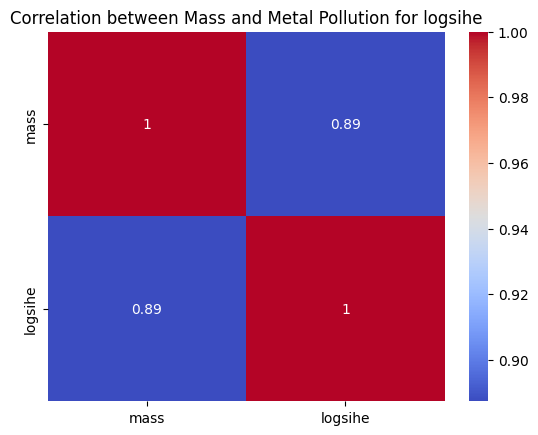

Not enough data for column logshe
For logcahe :Pearson correlation: 0.1503202647035929, P-value: 8.318233715863944e-05


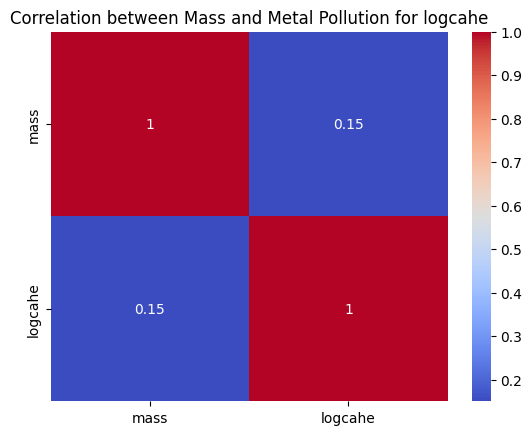

For logcah :Pearson correlation: -0.6884762949678841, P-value: 0.13045430476643363


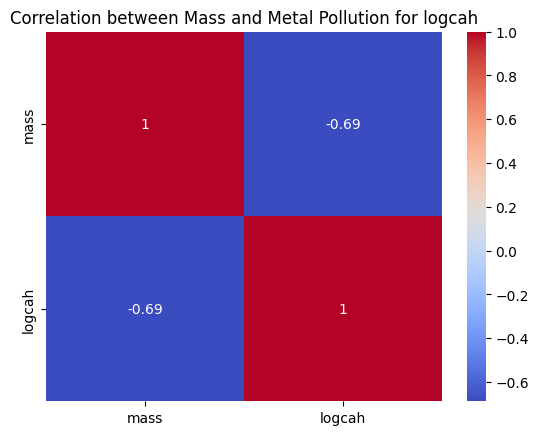

Not enough data for column logsche
For logtihe :Pearson correlation: 0.07988146642905772, P-value: 0.7377957204009322


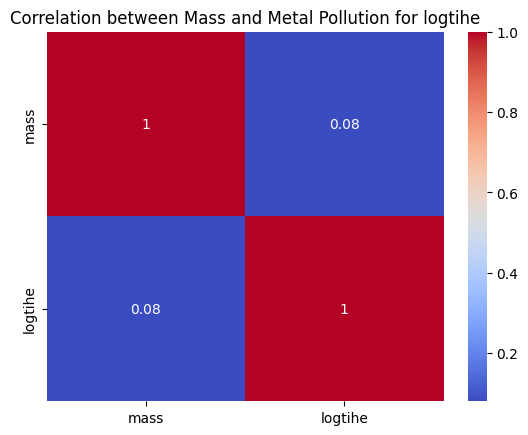

Not enough data for column logvhe
For logcrhe :Pearson correlation: 0.06408194557804478, P-value: 0.6868156681913273


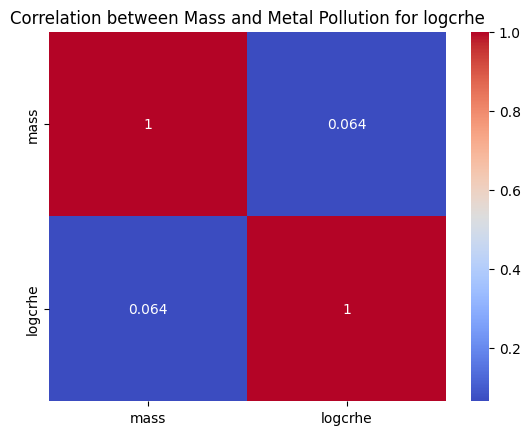

Not enough data for column logmnhe
For logfehe :Pearson correlation: 0.2621299247254516, P-value: 0.0010232195277463467


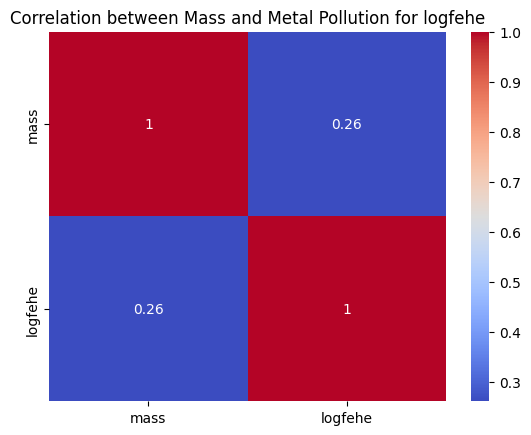

For lognihe :Pearson correlation: 0.10744655633175655, P-value: 0.7832065925267967


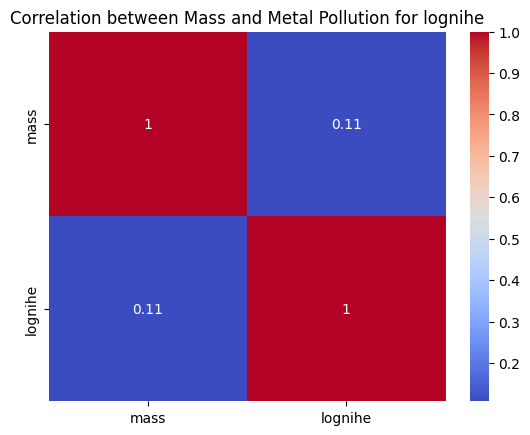

Not enough data for column logznhe
Not enough data for column logsrhe


In [29]:
correlation_and_pvalue_matrix =np.zeros(((len(dz_clean().columns[9:28])),2))
corr_matrix = np.zeros(len(dz_clean().columns[9:28]))
p_value_matrix = np.zeros(len(dz_clean().columns[9:28]))

for index, column in enumerate(dz_clean().columns[9:28]):
# for column in dz_clean().columns[9:28]:                                     # for repeating above step for all columns
    dz_clean_loc = dz_clean().loc[:,column]

    def columns_with_only_numeric_rows(column) :
        drop_NaN_values =dz_clean()[["mass",column]].dropna(axis=0)                       # Select the 'mass' and the current column from the dataset. Drop the NaN values if present in any of their rows

        drop_NaN_values["mass"] = pd.to_numeric(drop_NaN_values["mass"], errors='coerce')  # Convert both columns to numeric values,so non-numeric values like "<4.876" etc get converted into NaN
        drop_NaN_values[column] = pd.to_numeric(drop_NaN_values[column], errors='coerce')  

        drop_NaN_values_again = drop_NaN_values.dropna(axis=0)                             # Drop rows with newly formed NaN values after conversion

        return drop_NaN_values_again
    
    if len(columns_with_only_numeric_rows(column=column)) < 2:
     print(f"Not enough data for column {column}")
     continue     
    correlation, p_value = pearsonr(columns_with_only_numeric_rows(column)["mass"], columns_with_only_numeric_rows(column)[column])
    print(f"For {column} :Pearson correlation: {correlation}, P-value: {p_value}")

    correlation_matrix = columns_with_only_numeric_rows(column)[["mass",column]].corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation between Mass and Metal Pollution for {column}')
    plt.show()
    


In [30]:
# Failed subplot attempts

    # corr_matrix[index] = correlation

#     p_value_matrix[index] = p_value
#     correlation_and_pvalue_matrix[index] = [correlation,p_value]           # can be changed only to [correlation]
# print(f"correlation and p-value are {correlation_and_pvalue_matrix}")
#     if len(columns_with_only_numeric_rows(column=column)) < 2:
#      print(f"Not enough data for column {column}")
#      continue 
      
#     correlation_matrix_array = correlation_matrix_array.append(correlation_matrix)
# print(correlation_matrix_array)
        
#     if len(columns_with_only_numeric_rows(column)) < 2:
#      pass 
#     else:
#       correlation_matrix_list = correlation_matrix_list.append(correlation_matrix) 
# print(correlation_matrix_list)


# for index,column in enumerate(dz_clean().columns[9:28],start=0):
       
#         fig, axis = plt.subplots(1, len(dz_clean().columns[9:28]), figsize=(10, 4))
#         sns.heatmap(correlation_matrix[column], annot=True, cmap='coolwarm',ax=axis[index])
#         axis[index].set_xlabel(f'{column}')
#         axis[index].set_title(f'Correlation between Mass and Metal Pollution by {column}')
#         plt.show()



# for index,value in enumerate(correlation_and_pvalue_matrix,start=0):
#     print(index,value)
#     print(correlation_and_pvalue_matrix[0][0])


# for index,value in enumerate(correlation_and_pvalue_matrix):
#     figure, axes = plt.subplots(5, 4,figsize=(15, 10))
                    
#     sns.heatmap(correlation_and_pvalue_matrix[index],annot=True, cmap='coolwarm',ax=axes)
#     axes.set_title('Correlation between 2 units')
#     plt.show()


#for index,value in enumerate(correlation_and_pvalue_matrix):
#     correlation_matrix = columns_with_only_numeric_rows(column)[["mass",corr_matrix[index]]].corr(numeric_only=True)
#     figure, axes = plt.subplots(5, 4,figsize=(15, 10))
                        
#     sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',ax=axes)
#     axes.set_title('Correlation between 2 units')
#     plt.show()